In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc)
from scipy.stats import randint

In [2]:
#Read in the CSV file
mdf= pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D209/medical_clean.csv')

In [3]:
#Examine data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#Look for missing values
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
#Look for duplicated values
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
#Identify variables for research study
research_cols = [
    "ReAdmis", "Age", "Marital", "Gender", "VitD_levels", "Doc_visits", "Initial_admin", "vitD_supp",  "HighBlood",
    "Stroke", "Complication_risk", "Overweight", "Arthritis",
    "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety",
    "Allergic_rhinitis", "Reflux_esophagitis", "Asthma",
    "Initial_days"]
readmis_research= mdf[research_cols]
readmis_research.head()

,ReAdmis,Age,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,vitD_supp,HighBlood,Stroke,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,No,53,Divorced,Male,19.141466,6,Emergency Admission,0,Yes,No,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.585770
1,No,51,Married,Female,18.940352,4,Emergency Admission,1,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,15.129562
2,No,53,Widowed,Female,18.057507,4,Elective Admission,0,Yes,No,...,Yes,No,Yes,No,No,No,No,No,No,4.772177
3,No,78,Married,Male,16.576858,4,Elective Admission,0,No,Yes,...,No,Yes,No,No,No,No,No,Yes,Yes,1.714879
4,No,22,Widowed,Female,17.439069,5,Elective Admission,2,No,No,...,No,No,No,Yes,No,No,Yes,No,No,1.254807


In [7]:
#Look at info for new dataframe of study
readmis_research.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Marital             10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   Initial_admin       10000 non-null  object 
 7   vitD_supp           10000 non-null  int64  
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxie

In [8]:
#Create binary list and re-express variables to 0, 1
Binary_columns= ['ReAdmis','HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
readmis_research[Binary_columns]=readmis_research[Binary_columns].replace({'Yes': 1, 'No': 0})
print(readmis_research)

      ReAdmis  Age    Marital  Gender  VitD_levels  Doc_visits  \
0           0   53   Divorced    Male    19.141466           6   
1           0   51    Married  Female    18.940352           4   
2           0   53    Widowed  Female    18.057507           4   
3           0   78    Married    Male    16.576858           4   
4           0   22    Widowed  Female    17.439069           5   
...       ...  ...        ...     ...          ...         ...   
9995        0   25    Widowed    Male    16.980860           4   
9996        1   87    Widowed    Male    18.177020           5   
9997        1   45  Separated  Female    17.129070           4   
9998        1   43   Divorced    Male    19.910430           5   
9999        1   70  Separated  Female    18.388620           5   

              Initial_admin  vitD_supp  HighBlood  Stroke  ... Overweight  \
0       Emergency Admission          0          1       0  ...          0   
1       Emergency Admission          1          1    

In [9]:
#One-hot encode categorical variables using get dummies
readmis_research=pd.get_dummies(readmis_research, columns=['Marital'], prefix='Marital', drop_first=True);
readmis_research=pd.get_dummies(readmis_research, columns=['Gender'], prefix='Gender', drop_first=True);
readmis_research=pd.get_dummies(readmis_research, columns=['Initial_admin'], prefix='Initial_admin', drop_first=True);
readmis_research=pd.get_dummies(readmis_research, columns=['Complication_risk'], prefix='Complication_risk', drop_first=True)
print(readmis_research)

      ReAdmis  Age  VitD_levels  Doc_visits  vitD_supp  HighBlood  Stroke  \
0           0   53    19.141466           6          0          1       0   
1           0   51    18.940352           4          1          1       0   
2           0   53    18.057507           4          0          1       0   
3           0   78    16.576858           4          0          0       1   
4           0   22    17.439069           5          2          0       0   
...       ...  ...          ...         ...        ...        ...     ...   
9995        0   25    16.980860           4          1          1       0   
9996        1   87    18.177020           5          0          1       0   
9997        1   45    17.129070           4          0          1       0   
9998        1   43    19.910430           5          1          0       0   
9999        1   70    18.388620           5          1          0       0   

      Overweight  Arthritis  Diabetes  ...  Marital_Married  \
0           

In [10]:
#Look at data info after converting all variables to numeric values
readmis_research.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ReAdmis                              10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   VitD_levels                          10000 non-null  float64
 3   Doc_visits                           10000 non-null  int64  
 4   vitD_supp                            10000 non-null  int64  
 5   HighBlood                            10000 non-null  int64  
 6   Stroke                               10000 non-null  int64  
 7   Overweight                           10000 non-null  int64  
 8   Arthritis                            10000 non-null  int64  
 9   Diabetes                             10000 non-null  int64  
 10  Hyperlipidemia                       10000 non-null  int64  
 11  BackPain                     

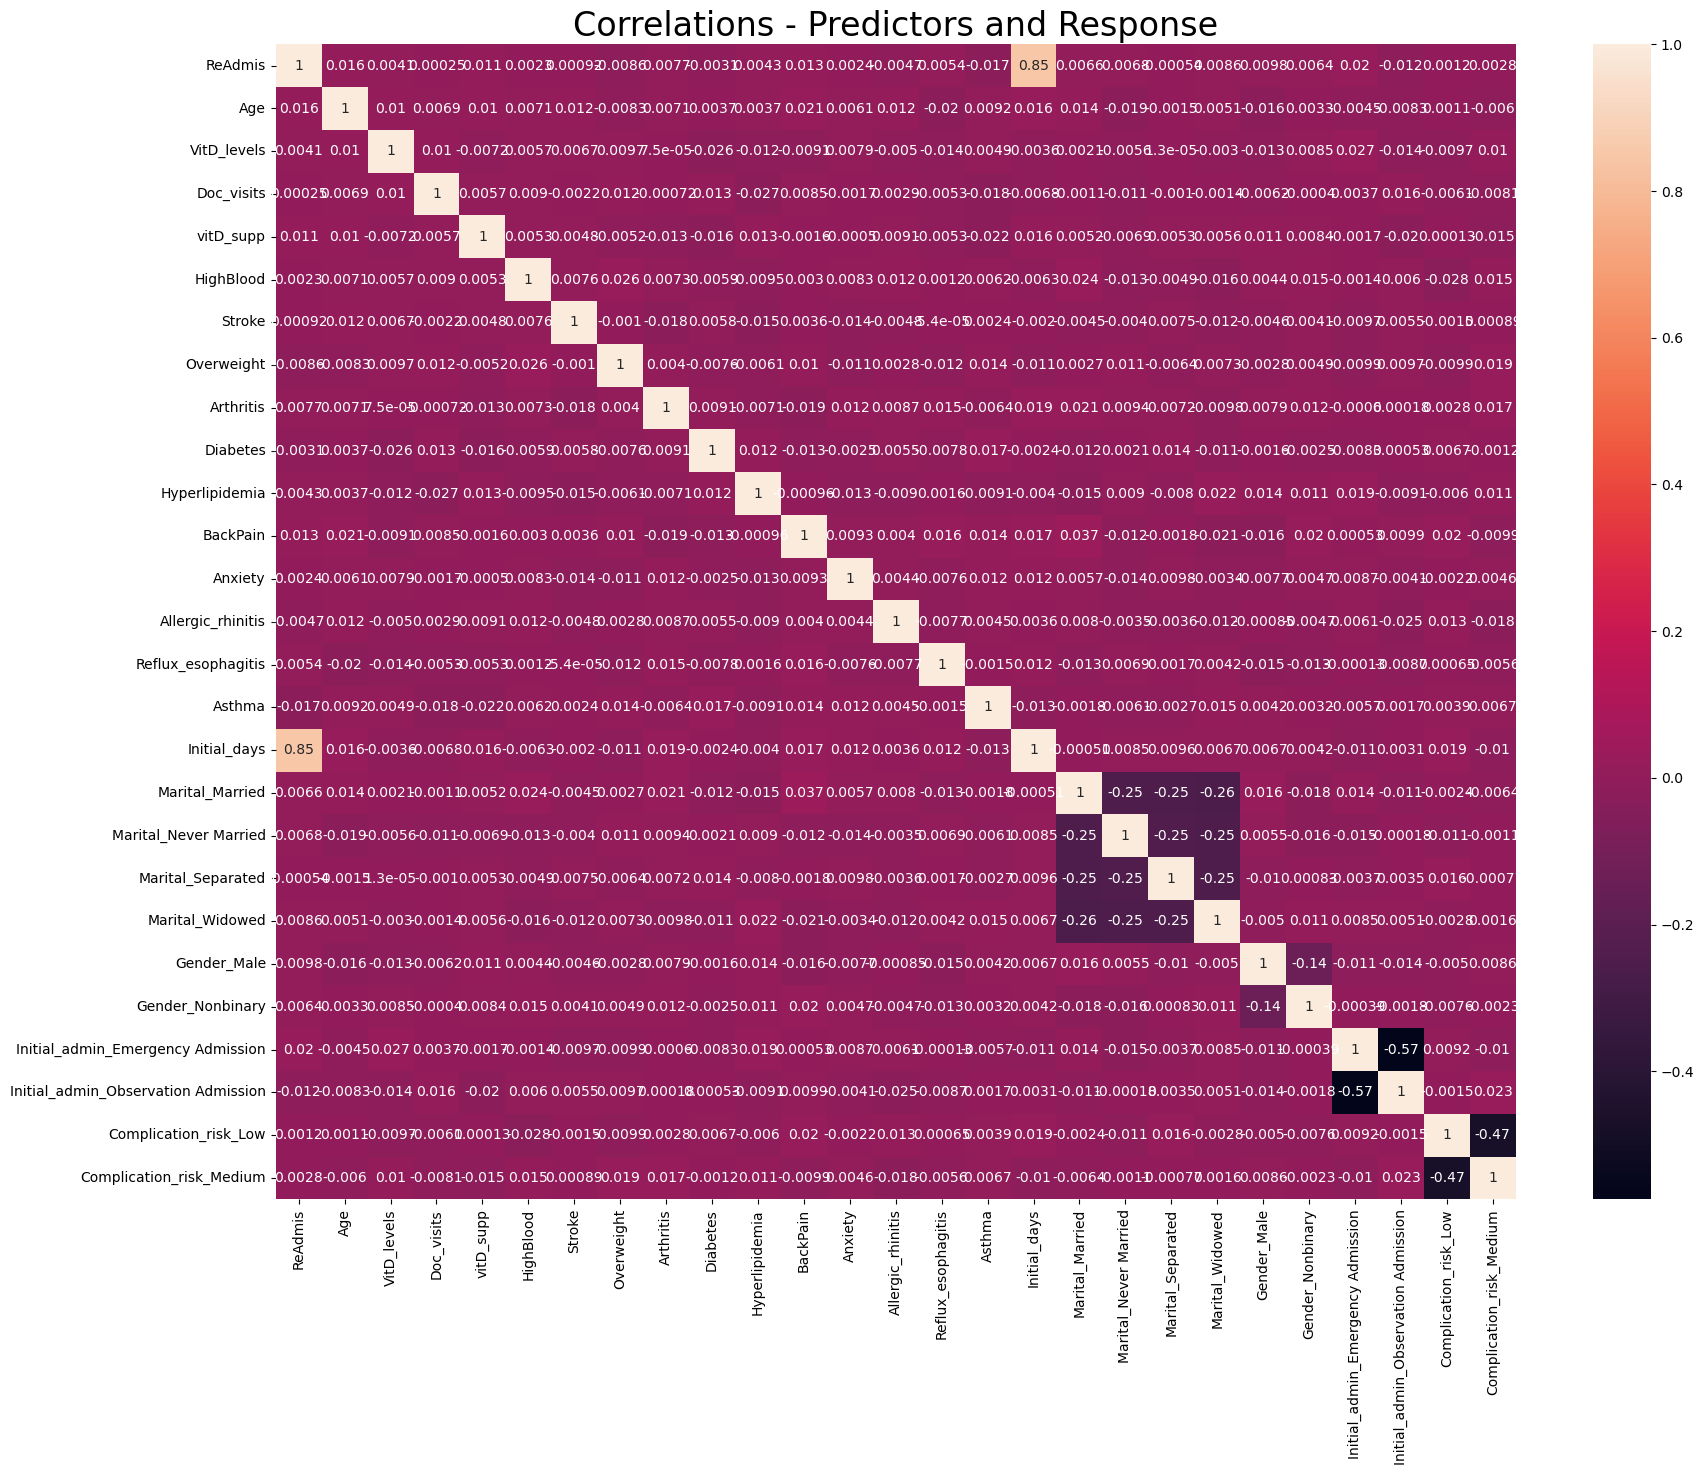

In [11]:
#Look for correlation in variables with heat map
coorl= readmis_research.corr()
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(coorl, annot=True, ax=ax)
plt.title("Correlations - Predictors and Response",fontsize=24)
plt.show()

In [12]:
#Export cleaned data
readmis_research.to_csv('/Users/robertpatton/Desktop/D209_Task2_prepared.csv', index=False)

In [13]:
#Identify our independent and dependent variables
X= readmis_research.drop(columns='ReAdmis', axis=1)
y= readmis_research['ReAdmis']

In [14]:
#Split dataset into train and test sets for X,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [15]:
#Export the training and test sets
X_train.to_csv('/Users/robertpatton/Desktop/PA2_X_train.csv', index=False)
X_test.to_csv('/Users/robertpatton/Desktop/PA2_X_test.csv', index=False)
y_train.to_csv('/Users/robertpatton/Desktop/PA2_y_train.csv', index=False)
y_test.to_csv('/Users/robertpatton/Desktop/PA2_y_test.csv', index=False)

In [16]:
#Fit and evaluate the model with an inital RandomForest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
#Predict intial accuracy of the RF model
y_pred= rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {score * 100:.2f}%")

Accuracy Score = 98.25%


In [18]:
#Perform hyperparameter tuning using RandomizedSearchCV
#Find the best parameters for running the model
param_dist = {'n_estimators': randint(50, 75, 100),
              'max_depth': randint(1,20)}

# Create a new random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14723f390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14723c150>})

In [19]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 169}


In [20]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {score * 100:.2f}%")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred)* 100:.2f}%")
print(f"Specificity: {recall_score(y_test, y_pred, pos_label=0) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100: .2f}%")

Accuracy Score = 98.25%
Recall (Sensitivity): 98.01%
Specificity: 98.40%
Precision:  97.36%


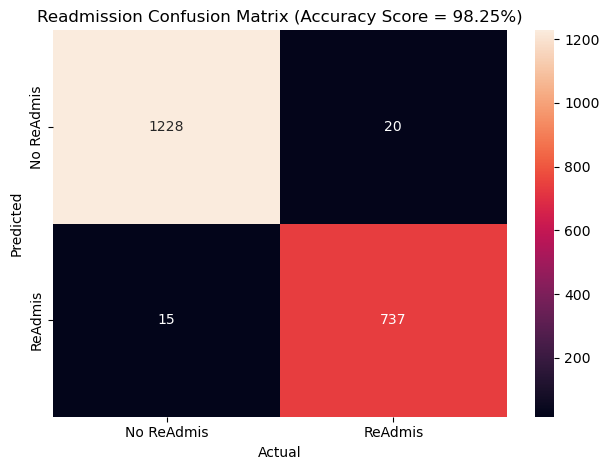

In [21]:
#Create confusion matrix for best fit model
score = accuracy_score(y_test, y_pred)
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title(f"Readmission Confusion Matrix (Accuracy Score = {score * 100:.2f}%)")
ax.xaxis.set_ticklabels(['No ReAdmis', 'ReAdmis'])
ax.yaxis.set_ticklabels(['No ReAdmis', 'ReAdmis'])
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.tight_layout()
plt.show()

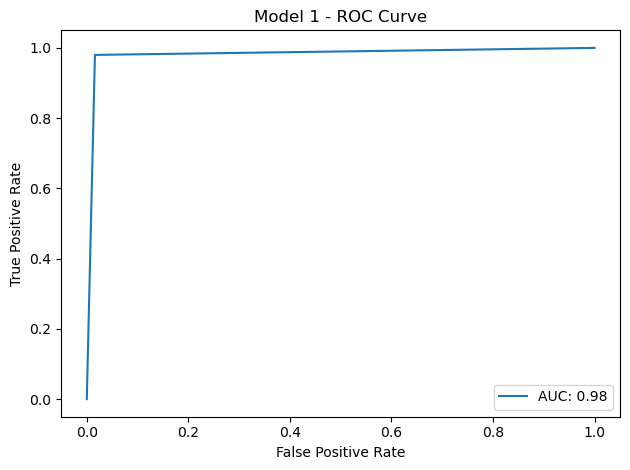

In [22]:
#Examine ROC curve and determine AUC of model performance
fpr, tpr, _ = roc_curve(y_test, y_pred)
ax = sns.lineplot(x=fpr, y=tpr, label=f"AUC: {auc(fpr, tpr):.2f}")
plt.title("Model 1 - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.tight_layout()
plt.show()

In [23]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

0.0175